# **Author : ROHIT WADHAVE**
###  **Oasis Infobyte** - Data Science 
#####            *(FEBRUARY'22)*



# Task 5 : SALES PREDICTION USING PYTHON

## **Read the csv dataset as a pandas dataframe.**

In [38]:
from google.colab import files
uploaded_files = files.upload()

Saving Advertising.csv to Advertising (1).csv


## **Importing all libraries required in this notebook**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
data = pd.read_csv("Advertising.csv")

## **Data Understanding**

In [41]:
pd.concat([data.head(),data.tail()])      # Show top 5 & bottom 5 rows

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [44]:
data.shape

(200, 5)

In [45]:
print(data.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [46]:
# This custom user defined function will give the datatype,count of null & non null values, count of Unique values present in dataset in the form of dataframe

def datainfo():
  df_temp = pd.DataFrame(index=data.columns)
  df_temp["Null value"] = data.isnull().sum()
  df_temp["% of the Null value"] = data.isnull().mean()*100
  df_temp["Not Null value"] = data.count()
  df_temp["Unique count"] = data.nunique()
  df_temp["Datatype"] = data.dtypes
  
  return df_temp

datainfo()

,Null value,% of the Null value,Not Null value,Unique count,Datatype
Unnamed: 0,0,0.0,200,200,int64
TV,0,0.0,200,190,float64
Radio,0,0.0,200,167,float64
Newspaper,0,0.0,200,172,float64
Sales,0,0.0,200,121,float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


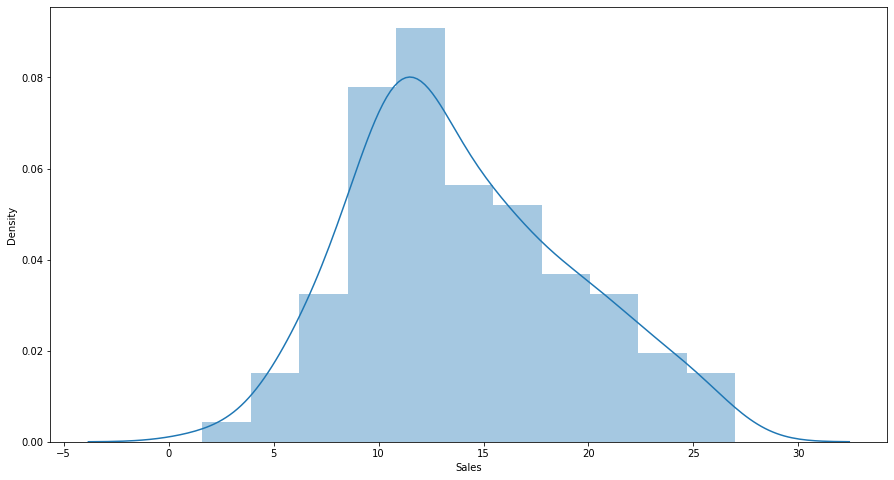

In [65]:
plt.figure(figsize=(15,8))         # Distribution of Sales
sb.distplot(data['Sales'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


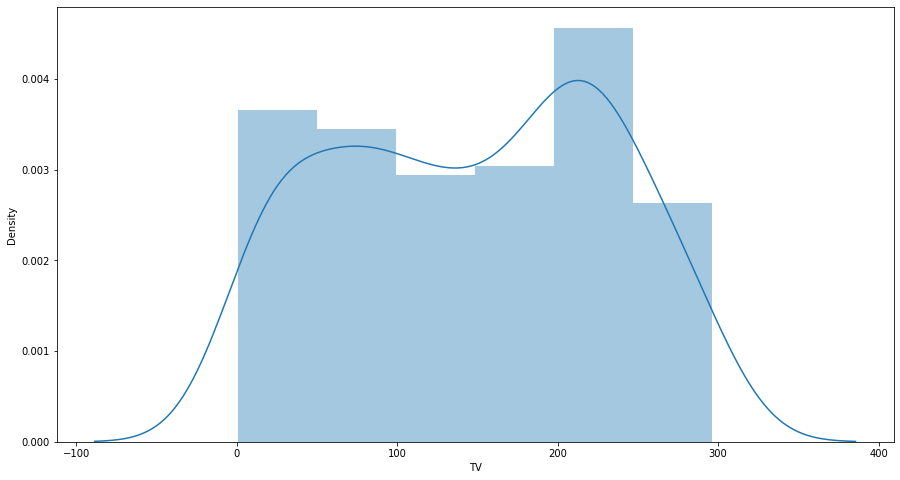

In [66]:
plt.figure(figsize=(15,8))     # Distribution of TVs
sb.distplot(data['TV'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


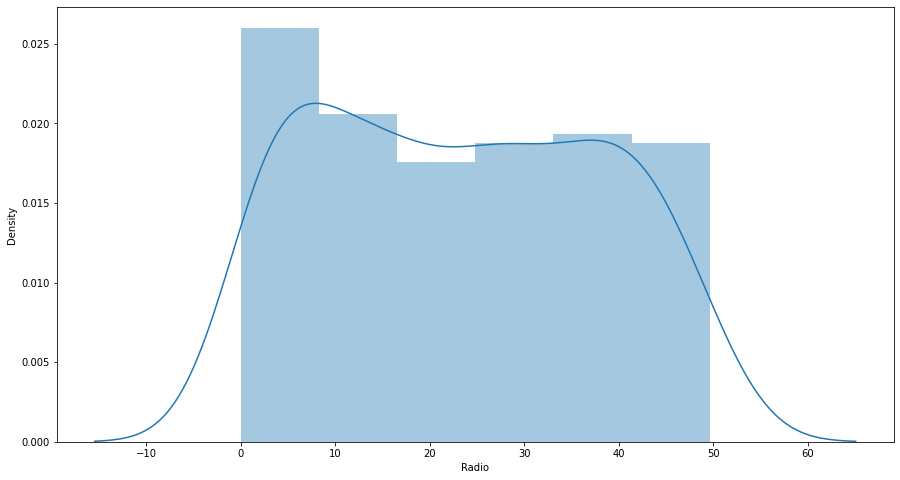

In [67]:
plt.figure(figsize=(15,8))    # Distribution of Radios
sb.distplot(data['Radio'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


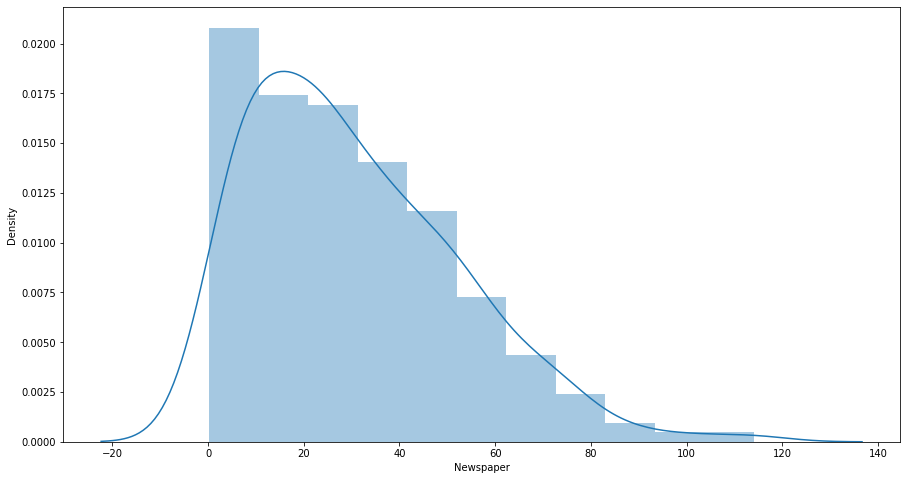

In [68]:
plt.figure(figsize=(15,8))   # Distribution of Newspaper
sb.distplot(data['Newspaper'])
plt.show()

In [51]:
data.duplicated().value_counts()

False    200
dtype: int64

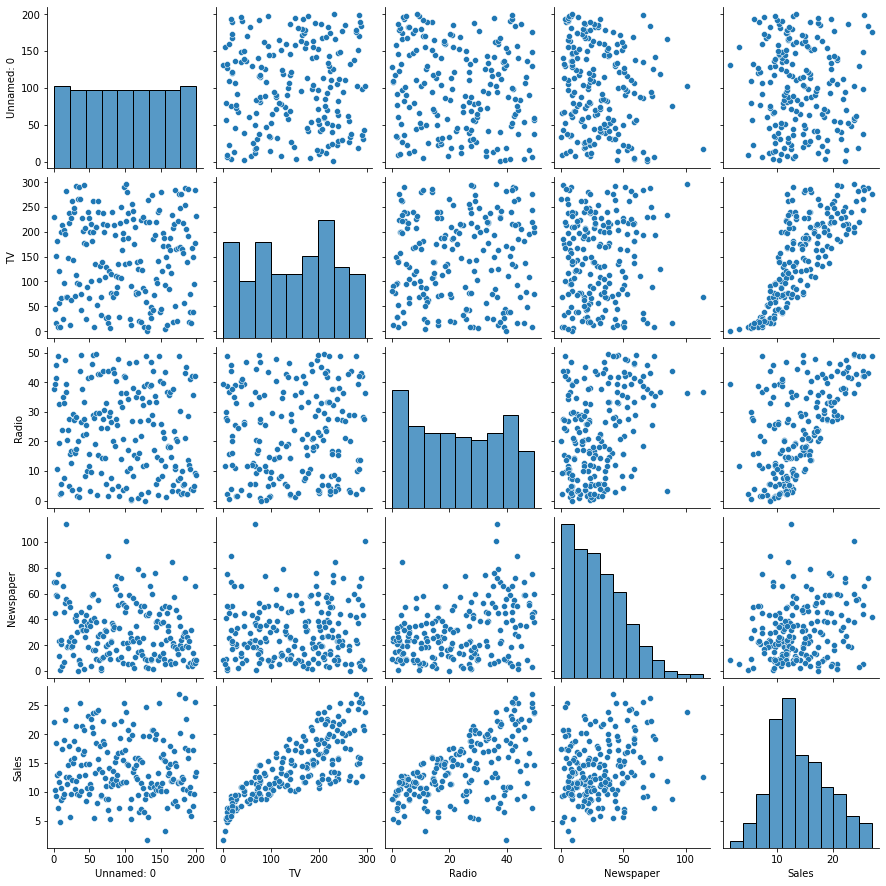

In [52]:
sb.pairplot(data)

<AxesSubplot:>

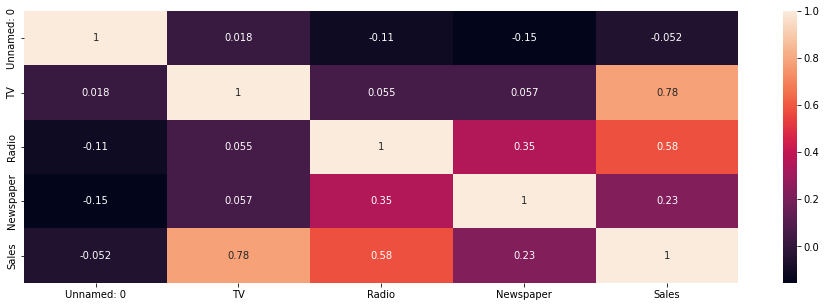

In [53]:
plt.figure(figsize = (16,5))
data_corr = data.corr()
sb.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True)


In [54]:
data1 = data.drop(['Unnamed: 0'], axis=1, inplace=True)
data1

In [55]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [56]:
X =np.array(data.drop(['Sales'], 1))
y =np.array(data['Sales'])

<ipython-input-56-165b47414717>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X =np.array(data.drop(['Sales'], 1))


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.8,test_size=0.2,random_state=0)


In [58]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [59]:
y_prediction = regressor1.predict(X_test)
y_prediction

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [60]:
# calculating the coefficient
cf = regressor1.coef_
cf

array([ 0.04458402,  0.19649703, -0.00278146])

In [61]:
# calculating the intercept
intercept = regressor1.intercept_
intercept

2.994893030495332

In [62]:
# calculating the R squared qvalue
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.8601145185017868

In [63]:
fc=pd.DataFrame(data={'Forecasted Sales': y_prediction.flatten()})
fc

,Forecasted Sales
0,10.057396
1,7.452281
2,7.019708
3,24.080297
4,12.017863
5,6.537939
6,12.782869
7,15.109746
8,10.769740
9,16.343580


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


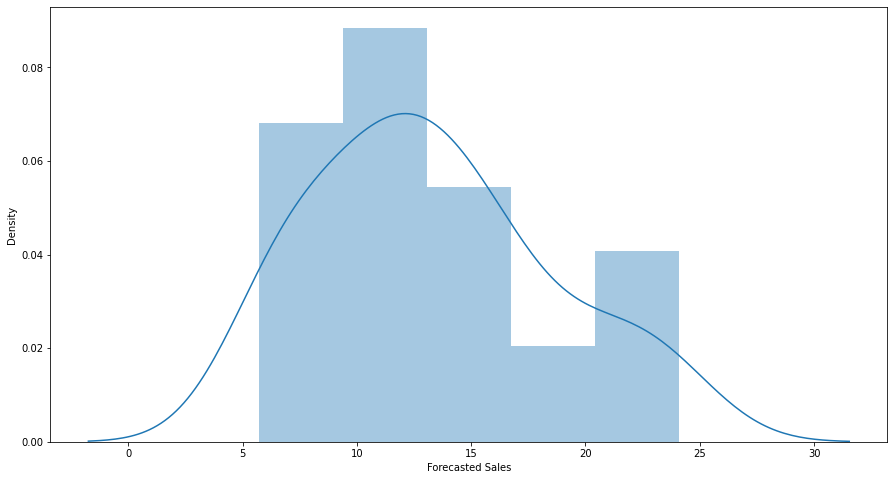

In [64]:
pt.figure(figsize=(15,8))
sb.distplot(fc['Forecasted Sales'])
pt.show()